## Description of Notebook

The notebook is used to look closer into the power spectra of E_perp

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import kineticsim_reader as kr
import pickle
import os
import random
from scipy.signal import savgol_filter
from tqdm import tqdm
from matplotlib.animation import FuncAnimation

In [2]:
simfiles = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
    'particles.d11_A0.75Hepp_beta1_256',\
    'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
    'particles.d11_E11Ap4.3Aa1.6',\
    'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
    'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
    'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
    'particles.d11_He++A10_256_iden0eps0',\
    'particles.d11_He++v2_256_iden0eps1e-4t600',\
    'particles.d11_He++vd1.5_256_iden0eps1e-4',\
    'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
    'particles.d11_pv1Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
    'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
    'particles.d11_pv2Ap1Ab1betac0.429betab0.858_128_128x2_dx0.75_t3000',\
    'particles.d11_pv2Ap1Ab2betac0.429betab0.858_128_128x2_dx0.75_t3000',\
    'particles.d11_pv2Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
    'particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
    'particles.d11_pv2av2Ap1Aa1beta0.429_128_128x2_dx0.75_t3000',\
    'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
    'particles.d11_vap1.2Ap1Aa0.75_rdna_0.05',\
    'particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007',\
    'particles.d11_vap1.5Ap1.5Aa1rdna_0.007']

fldfiles = ['fields.d10_A0.5Hepp_beta0.5eps1e-4_256',\
    'fields.d10_A0.75Hepp_beta1_256',\
    'fields.d10_E11Ap3.3Aa2.0Vd0.42',\
    'fields.d10_E11Ap4.3Aa1.6',\
    'fields.d10_E11Ap4.3Aa1.6Vd0.32',\
    'fields.d10_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
    'fields.d10_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
    'fields.d10_He++A10_256_iden0eps0',\
    'fields.d10_He++v2_256_iden0eps1e-4t600',\
    'fields.d10_He++vd1.5_256_iden0eps1e-4',\
    'fields.d10_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
    'fields.d10_pv1Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
    'fields.d10_pv2a_128x3_iden0eps1e-4_dx0.75',\
    'fields.d10_pv2Ap1Ab1betac0.429betab0.858_128_128x2_dx0.75_t3000',\
    'fields.d10_pv2Ap1Ab2betac0.429betab0.858_128_128x2_dx0.75_t3000',\
    'fields.d10_pv2Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
    'fields.d10_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
    'fields.d10_pv2av2Ap1Aa1beta0.429_128_128x2_dx0.75_t3000',\
    'fields.d10_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
    'fields.d10_vap1.2Ap1Aa0.75_rdna_0.05',\
    'fields.d10_vap1.2Ap3.35Aa2.05rdna_0.007',\
    'fields.d10_vap1.5Ap1.5Aa1rdna_0.007']

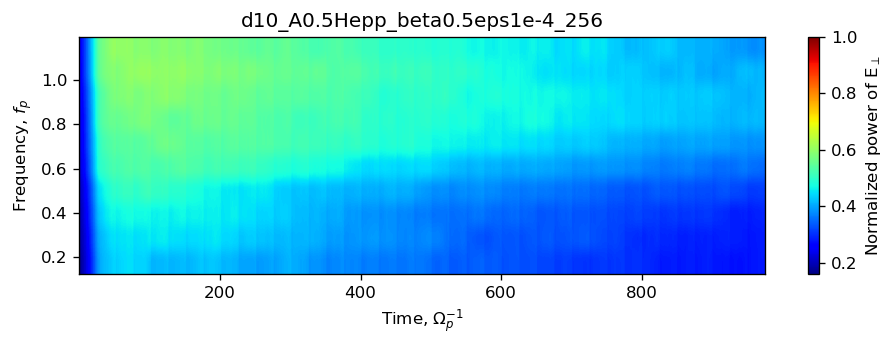

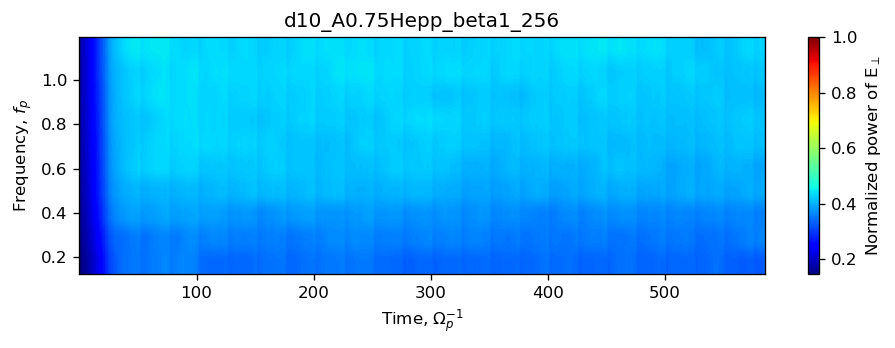

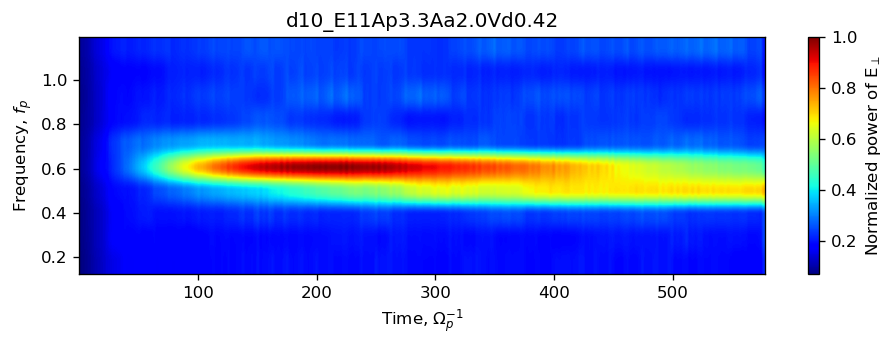

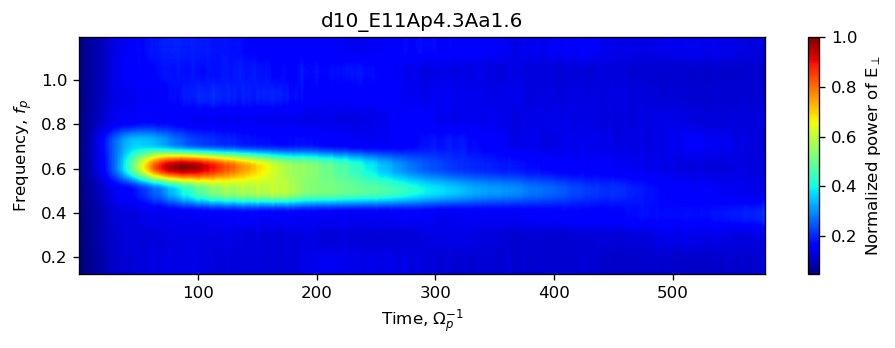

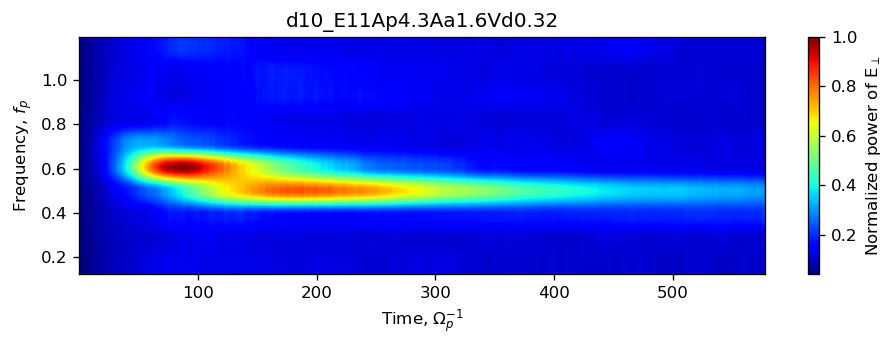

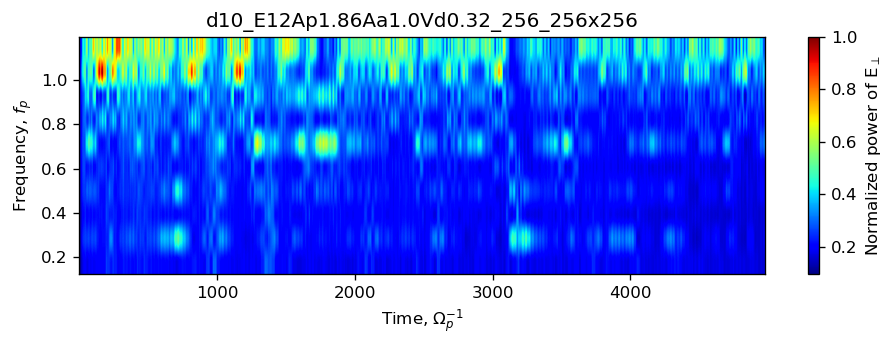

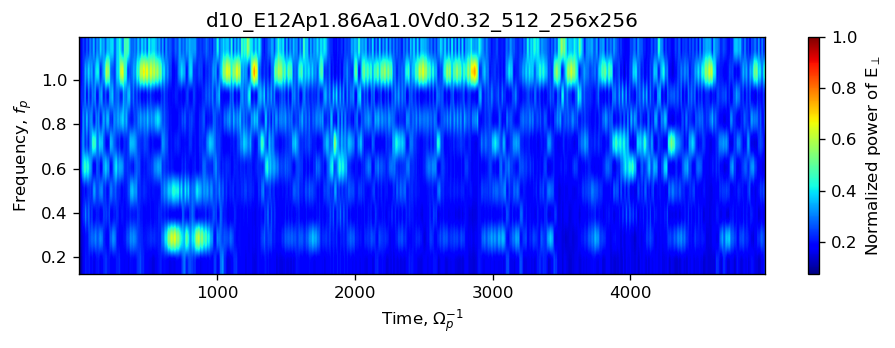

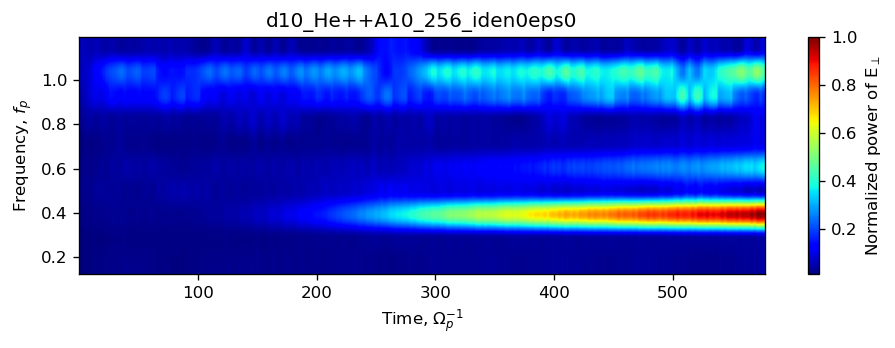

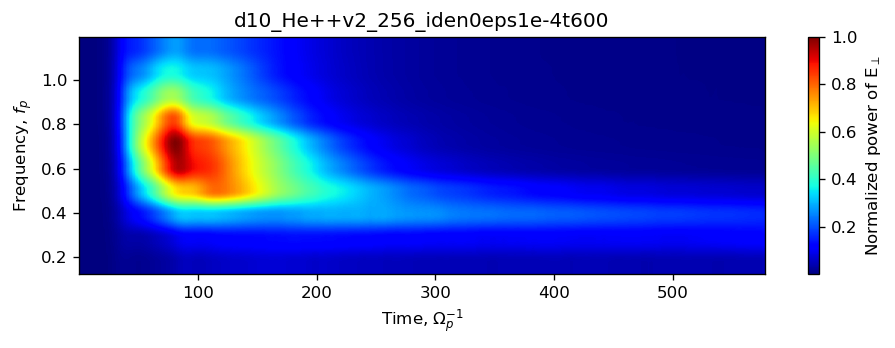

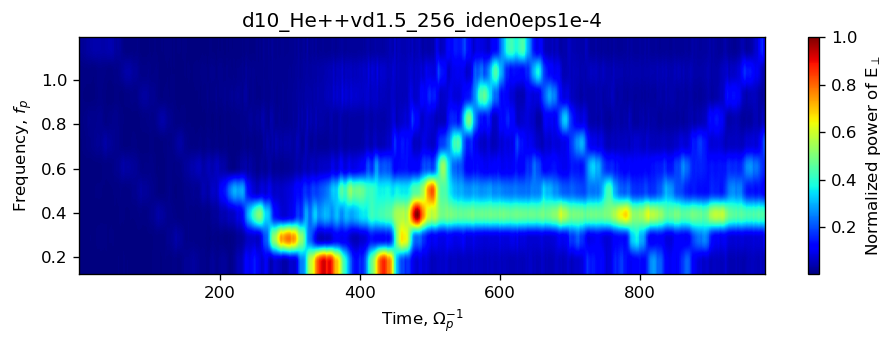

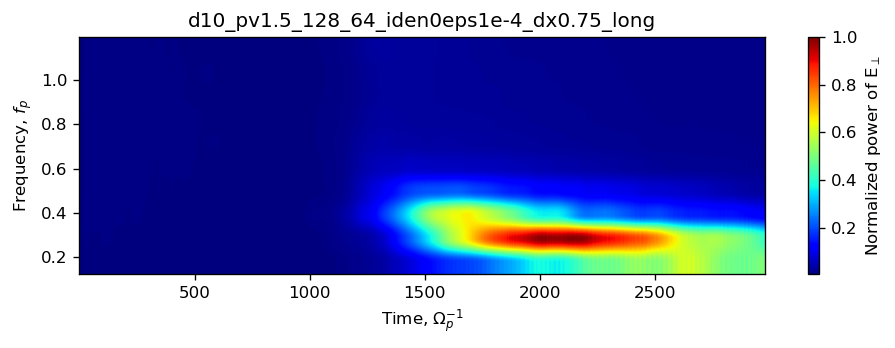

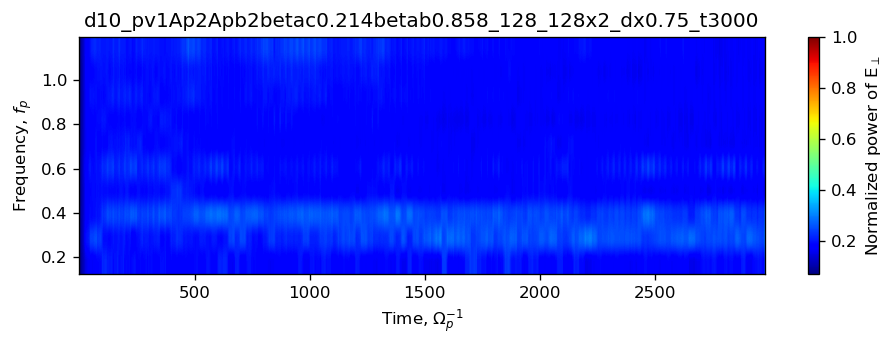

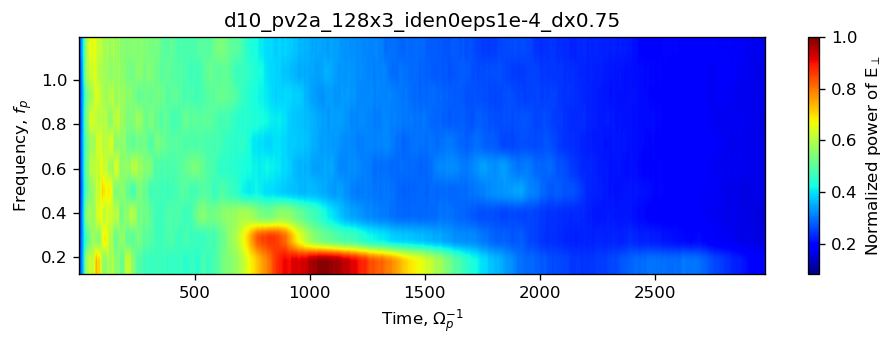

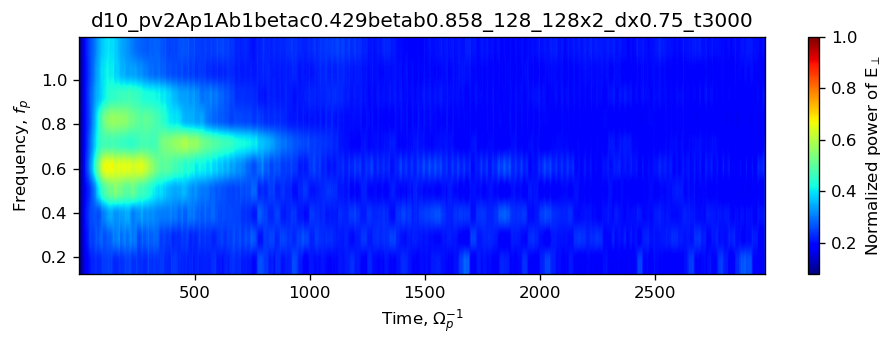

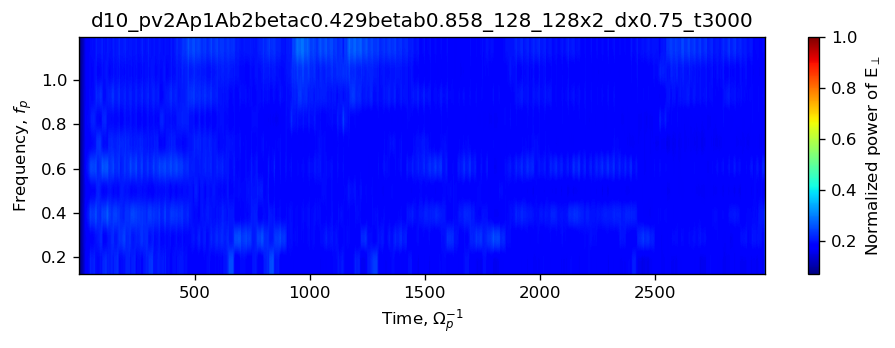

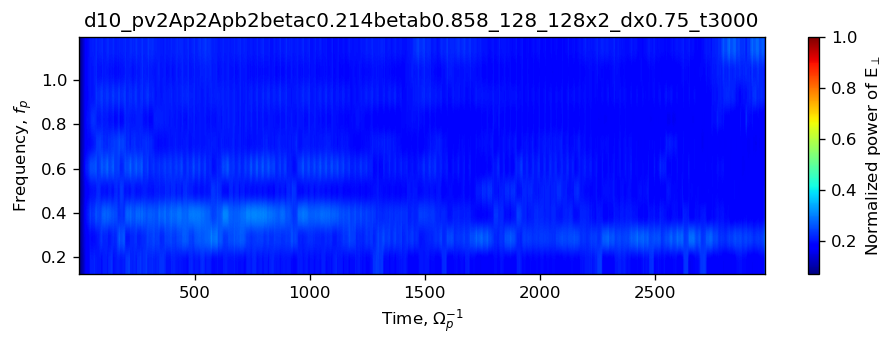

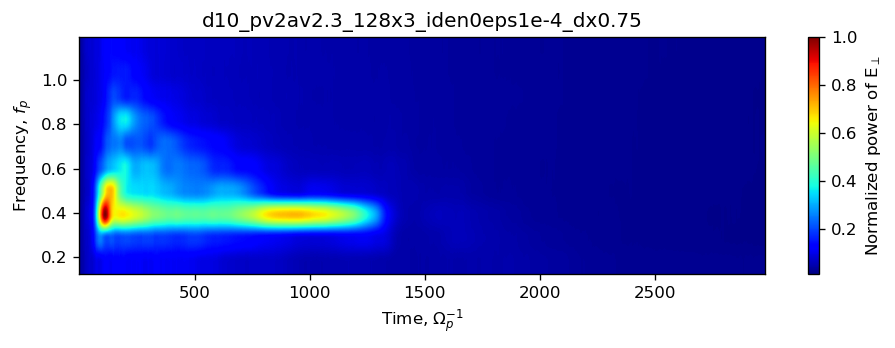

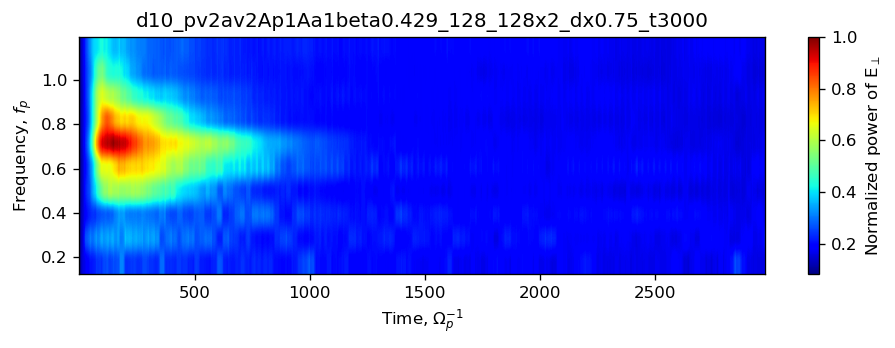

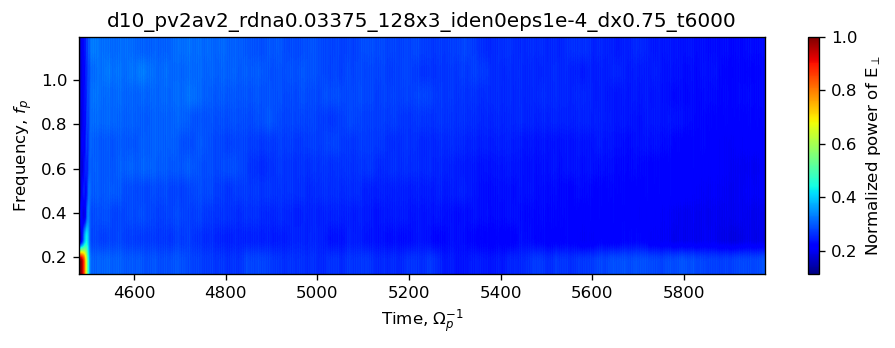

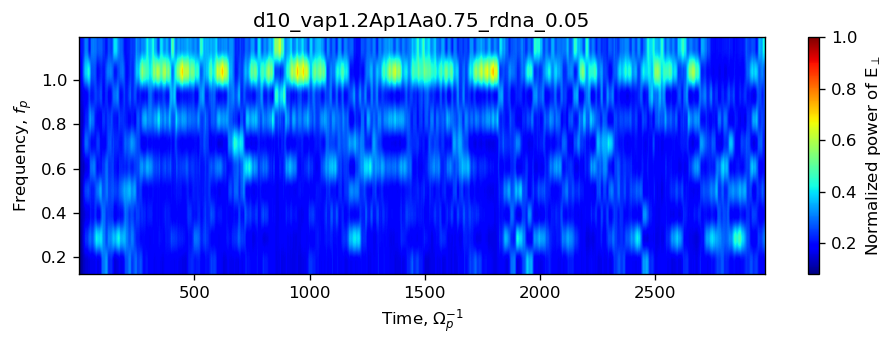

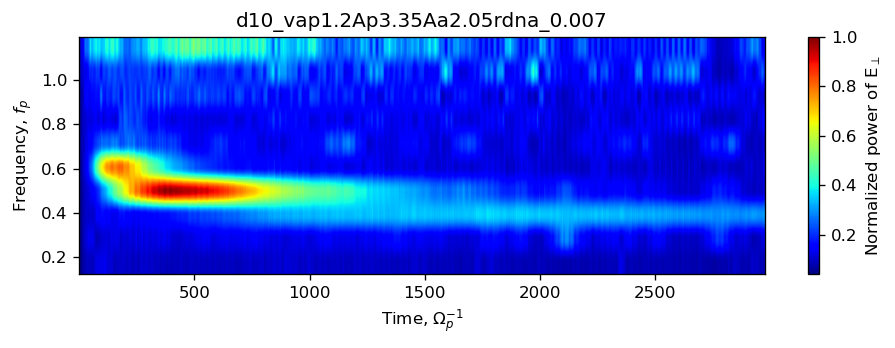

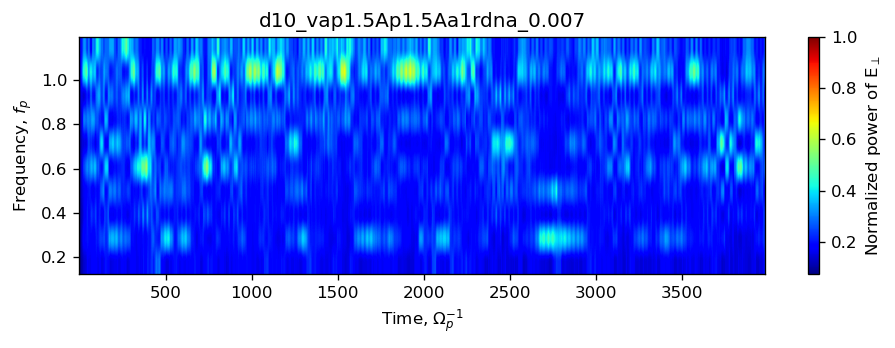

In [40]:
for fldfile in fldfiles:
    spectrum = np.load('./processing_results/' + fldfile + '.ps_ps.npy')[11:,:]
    #for t in range (0, spectrum.shape[1], 1):
    #    spectrum[:,t] /= np.amax(spectrum[:,t])
    spectrum /= np.amax(spectrum)
    timing = np.load('./processing_results/' + fldfile + '.ps_inttiming.npy')
    freqs = np.load('./processing_results/' + fldfile + '.ps_freqs.npy')[11:]*2.0*3.1415926
    
    im, ax = plt.subplots(1, 1, figsize=(8,3), dpi=120)
    fig = ax.imshow(spectrum, origin='lower', extent=[timing[0], timing[-1], freqs[0], freqs[-1]], 
                  aspect='auto', cmap='jet')
    ax.set(xlabel=r'Time, $\Omega{}_{p}^{-1}$', ylabel=r'Frequency, $f_{p}$', \
           title=fldfile[7:], xlim=[timing[0],timing[-10]])
    
    cbar = im.colorbar(fig, ax=ax, label=r'Normalized power of E$_{\perp}$')
    plt.tight_layout()
    plt.show()
    plt.close()

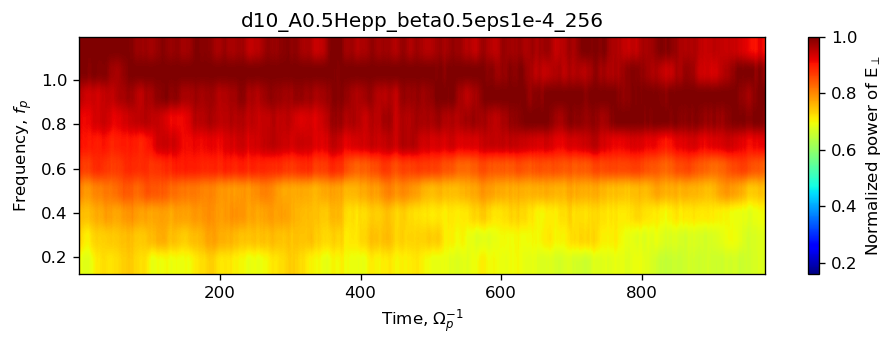

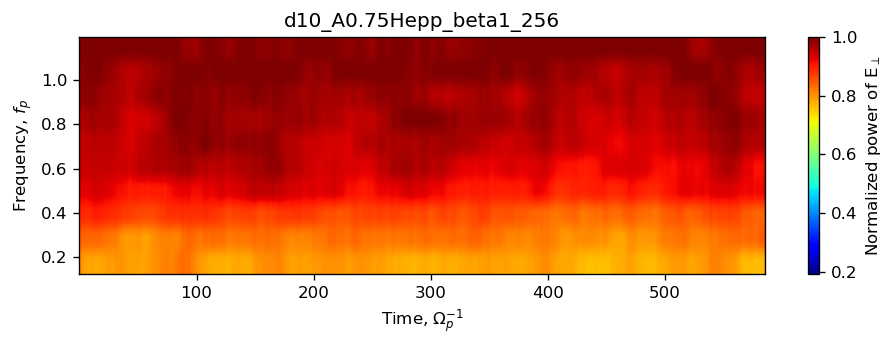

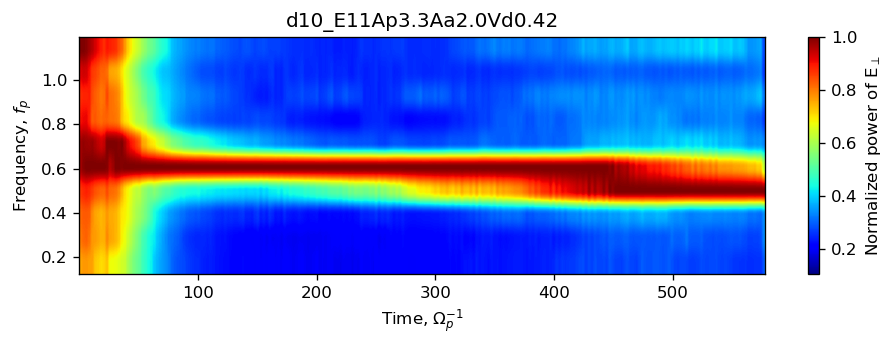

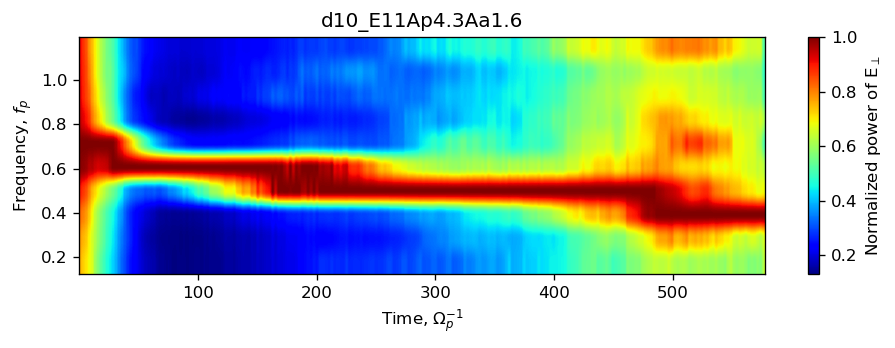

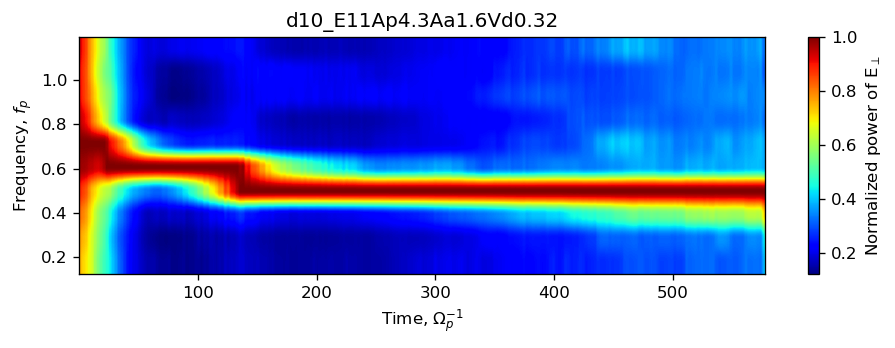

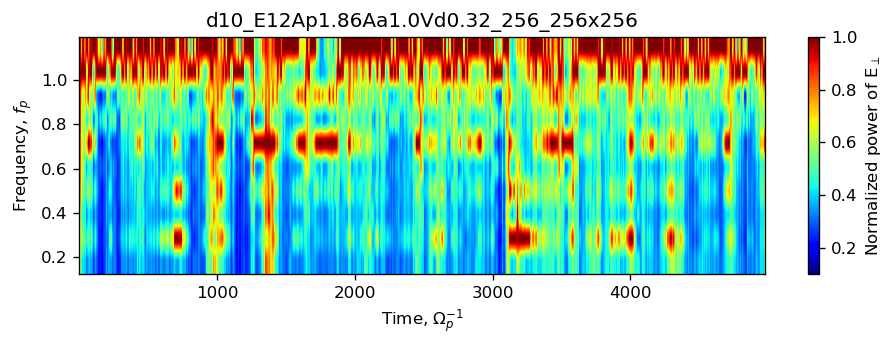

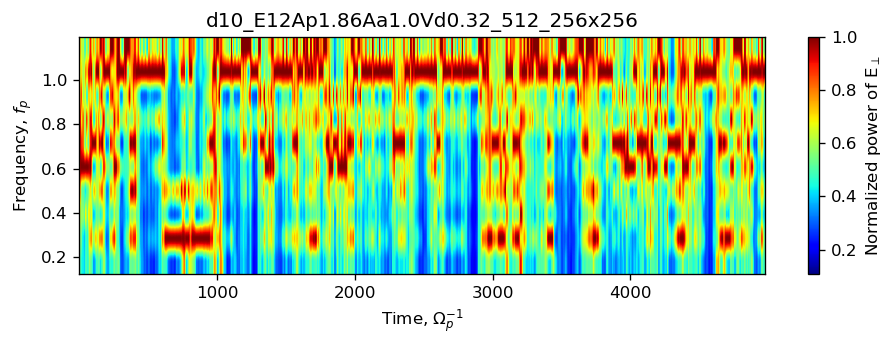

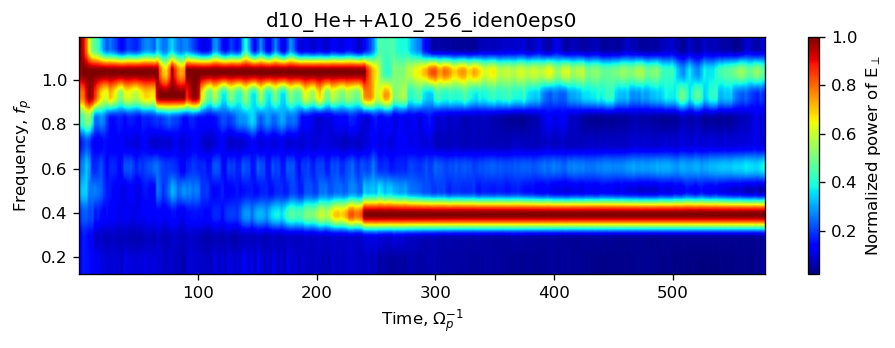

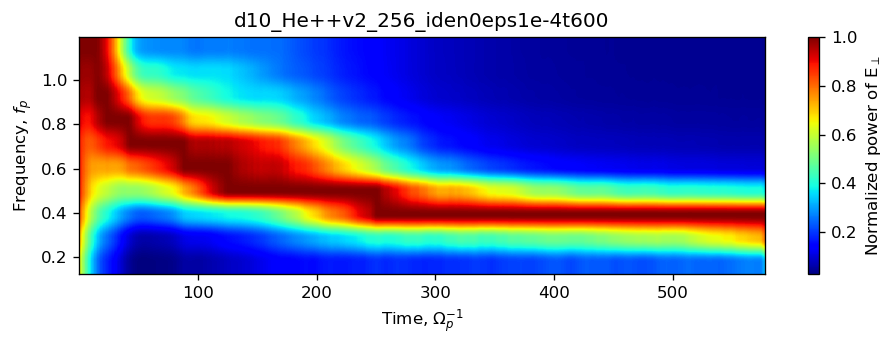

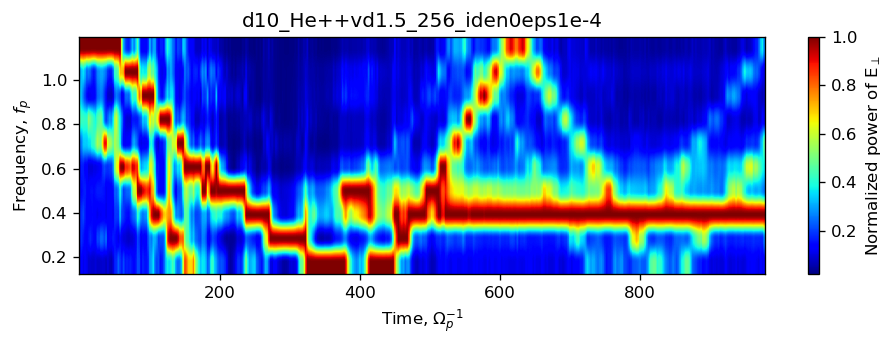

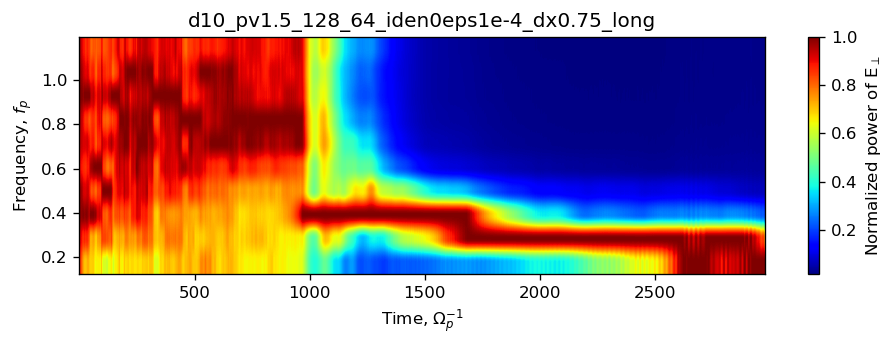

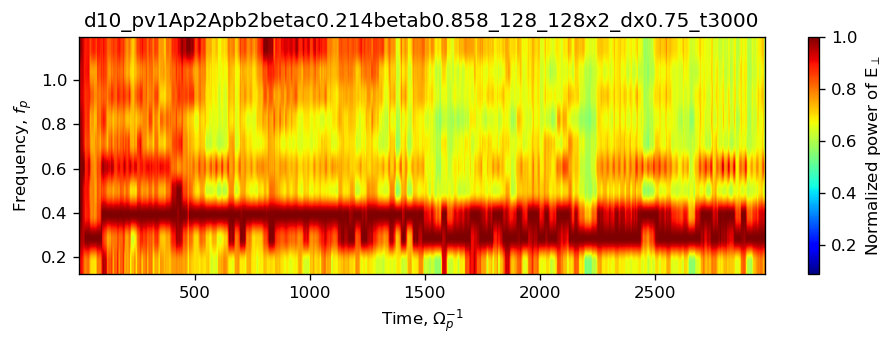

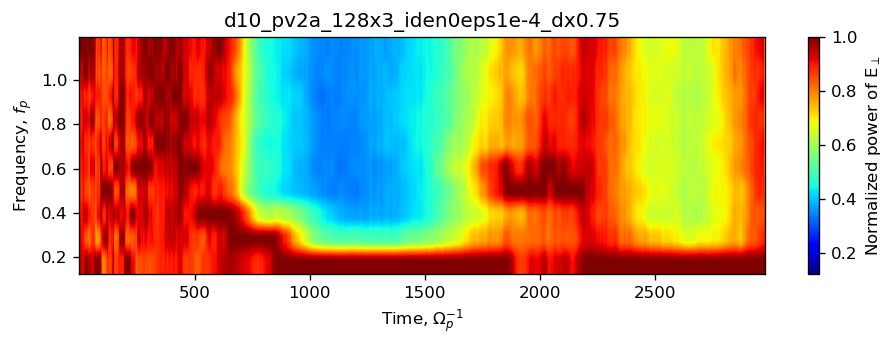

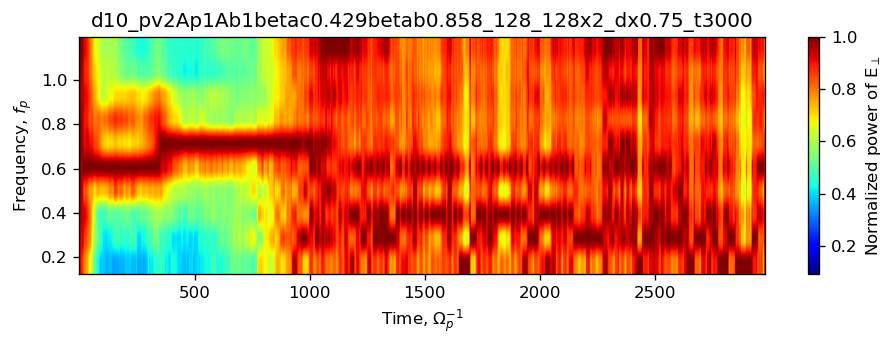

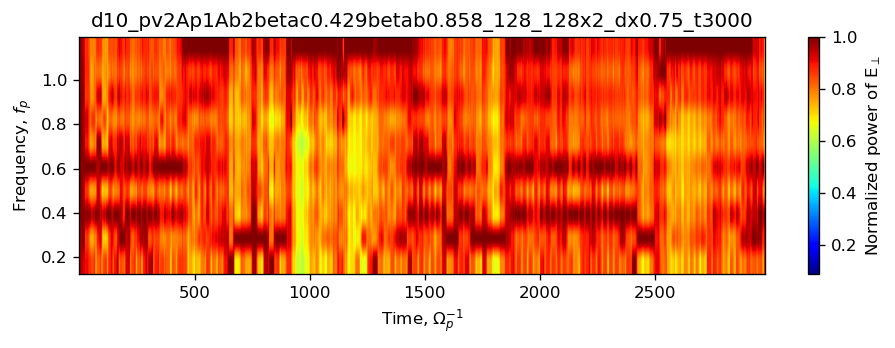

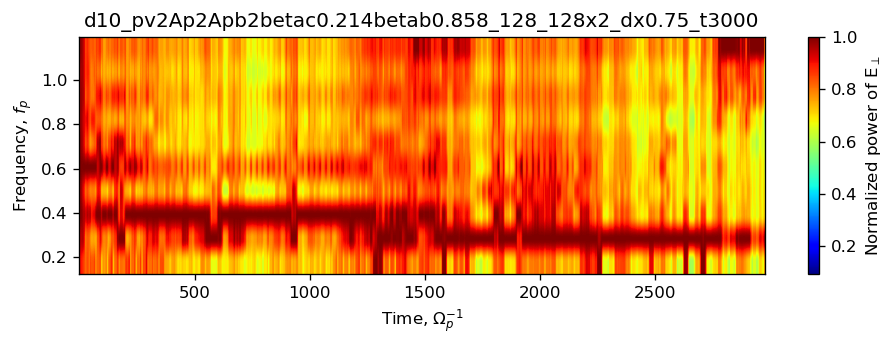

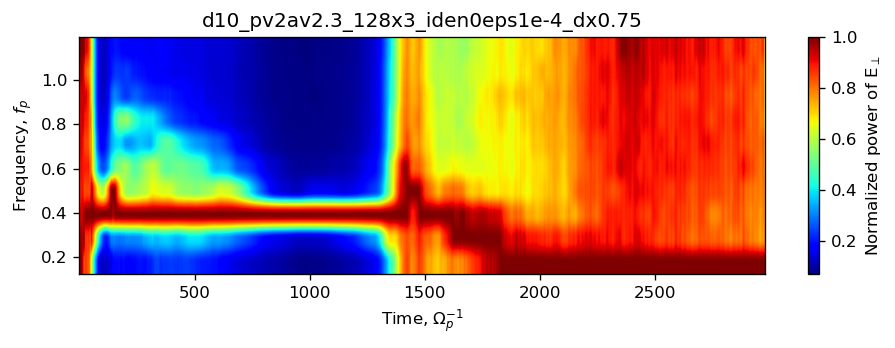

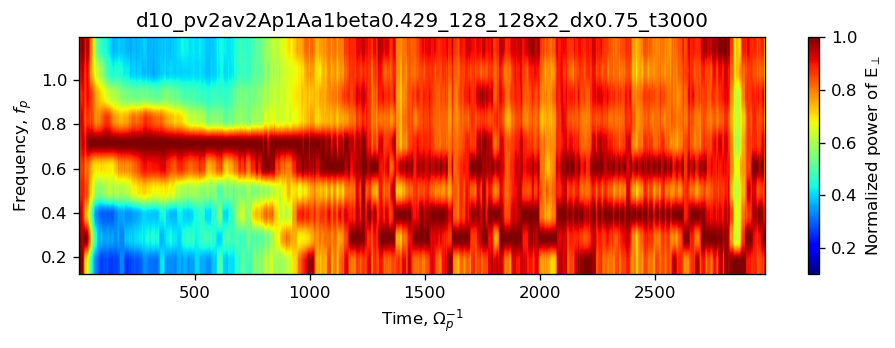

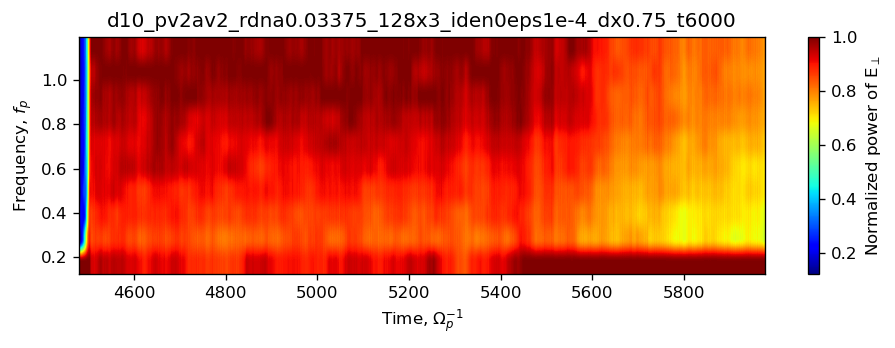

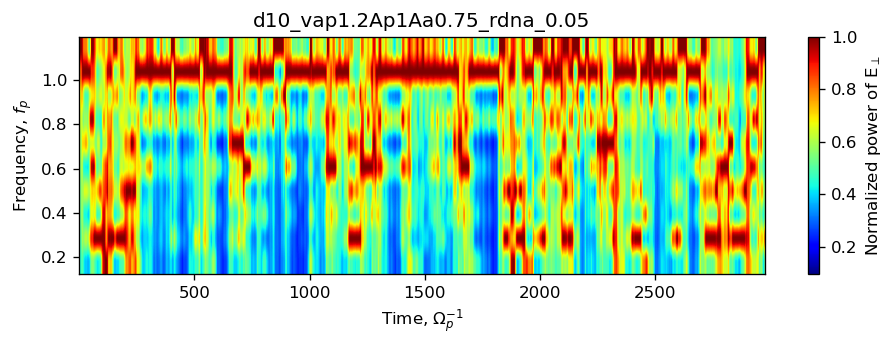

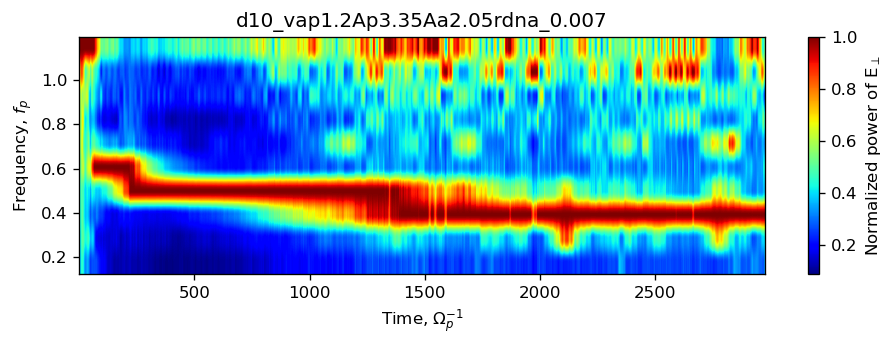

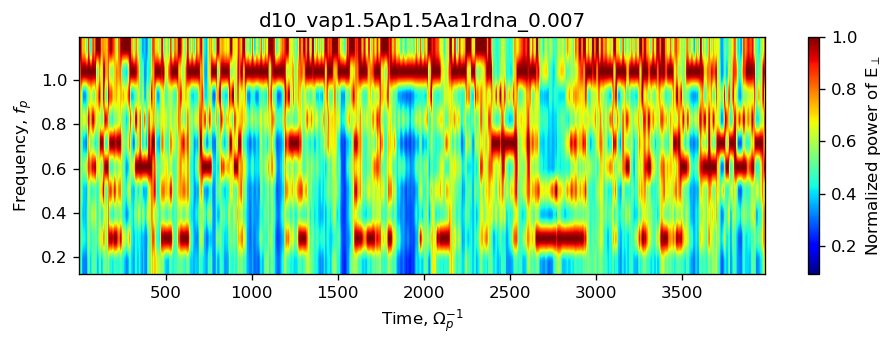

In [41]:
for fldfile in fldfiles:
    spectrum = np.load('./processing_results/' + fldfile + '.ps_ps.npy')[11:,:]
    for t in range (0, spectrum.shape[1], 1):
        spectrum[:,t] /= np.amax(spectrum[:,t])
    #spectrum /= np.amax(spectrum)
    timing = np.load('./processing_results/' + fldfile + '.ps_inttiming.npy')
    freqs = np.load('./processing_results/' + fldfile + '.ps_freqs.npy')[11:]*2.0*3.1415926
    
    im, ax = plt.subplots(1, 1, figsize=(8,3), dpi=120)
    fig = ax.imshow(spectrum, origin='lower', extent=[timing[0], timing[-1], freqs[0], freqs[-1]], 
                  aspect='auto', cmap='jet')
    ax.set(xlabel=r'Time, $\Omega{}_{p}^{-1}$', ylabel=r'Frequency, $f_{p}$', \
           title=fldfile[7:], xlim=[timing[0],timing[-10]])
    
    cbar = im.colorbar(fig, ax=ax, label=r'Normalized power of E$_{\perp}$')
    plt.tight_layout()
    plt.show()
    plt.close()

In [34]:
for fldfile in fldfiles:
    if (fldfile != 'fields.d10_vap1.2Ap3.35Aa2.05rdna_0.007'): continue
    spectrum = np.load('./processing_results/' + fldfile + '.ps_ps.npy')[11:,:]
    #for t in range (0, spectrum.shape[1], 1):
    #    spectrum[:,t] /= np.amax(spectrum[:,t])
    spectrum /= np.amax(spectrum)
    print(spectrum.shape)
    timing = np.load('./processing_results/' + fldfile + '.ps_inttiming.npy')
    print(timing[180])
    print(spectrum[:,180])
    freqs = np.load('./processing_results/' + fldfile + '.ps_freqs.npy')[11:]*2.0*3.1415926
    print(freqs)
    break

(10, 1201)
450.02500000037253
[0.10112726 0.11070658 0.20063198 0.95439475 0.2924553  0.14950506
 0.14048035 0.20175085 0.26179516 0.51497668]
[0.11967972 0.23935944 0.35903915 0.47871887 0.59839859 0.71807831
 0.83775803 0.95743774 1.07711746 1.19679718]
